In [9]:
import os
import random
import cv2
import numpy as np
import ntpath
import seaborn as sns
import keras
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Model
from keras.layers import Flatten, Dense, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.optimizers import SGD
from keras.regularizers import l2
from concurrent.futures import ProcessPoolExecutor

# Configuration

In [7]:
CORE = 4  # cpu core

# datasets directory
TRAIN_DIR = 'data/train/'
TEST_DIR = 'data/test/'
LABELS_CSV = 'data/labels.csv'

# image shape
ROWS = 128
COLS = 128
CHANNELS = 3

## Preparing dataset

Train shape: (1000, 128, 128, 3)
Test shape: (25, 128, 128, 3)


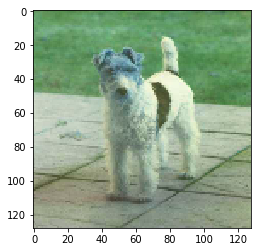

In [5]:
# make fullpath
train_images = [os.path.join(TRAIN_DIR, i) for i in os.listdir(TRAIN_DIR)]
test_images = [os.path.join(TEST_DIR, i) for i in os.listdir(TEST_DIR)]

# shuffle dataset
random.shuffle(train_images)

# reduce dataset for experimenting
train_images = train_images[:1000]
test_images = test_images[:25]


def resize_img(file_path):
    img = cv2.imread(file_path, cv2.IMREAD_COLOR)
    return cv2.resize(img, (ROWS, COLS), interpolation=cv2.INTER_CUBIC)


def prep_data(images):
    count = len(images)
    data = np.ndarray((count, ROWS, COLS, CHANNELS), dtype=np.uint8)

    with ProcessPoolExecutor(max_workers=CORE) as executor:
        data[:] = list(executor.map(resize_img, images))

    return data


train = prep_data(train_images)
test = prep_data(test_images)

print("Train shape: {}".format(train.shape))
print("Test shape: {}".format(test.shape))

# check sample output
plt.imshow(train[0])
plt.show()

## Create train labels

In [14]:
df_label = pd.read_csv(LABELS_CSV)
for img in train_images:
    img_id = ntpath.basename(img).split('.')[0]
    
df_label['id' == 'ntpath.basename']

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
5,002211c81b498ef88e1b40b9abf84e1d,bedlington_terrier
6,00290d3e1fdd27226ba27a8ce248ce85,bedlington_terrier
7,002a283a315af96eaea0e28e7163b21b,borzoi
8,003df8b8a8b05244b1d920bb6cf451f9,basenji
9,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound
